In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import torchvision.models as models
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.optim import lr_scheduler
from random import *
import os
import cv2
import copy

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [4]:
test.head()

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4


In [5]:
def make_folder(directory):
    if not os.path.isdir(directory):
        os.mkdir(directory)

path_train = os.path.join(os.getcwd(), 'emnist/train')
path_val = os.path.join(os.getcwd(), 'emnist/val')
path_test = os.path.join(os.getcwd(), 'emnist/test')

In [6]:
make_folder(path_train)
make_folder(path_val)
make_folder(path_test)

for i in range(10):
    path_train_digit = os.path.join(path_train, str(i))
    path_val_digit = os.path.join(path_val, str(i))
    make_folder(path_train_digit)
    make_folder(path_val_digit)

In [7]:
for i in range(len(train)):
    digit = train.loc[i, 'digit']
    letter = train.loc[i, 'letter']
    img = train.loc[i, '0':].values.reshape(28, 28).astype(int)

    path_train_digit = os.path.join(path_train, str(digit))
    path_val_digit = os.path.join(path_val, str(digit))
    
    if digit == 0:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 1:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 2:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 3:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 4:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 5:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
        
    elif digit == 6:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 7:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 8:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 9:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

In [8]:
for i in range(len(test)):
    letter = test.loc[i, 'letter']
    img = test.loc[i, '0':].values.reshape(28, 28).astype(int)
    
    path_test_digit = os.path.join(path_test, '%d_%c.jpg'%(i, letter))
    cv2.imwrite(path_test_digit, img)

### 데이터셋

In [232]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Cutout, Rotate, HorizontalFlip
)
from albumentations.pytorch import ToTensor

In [233]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
}

In [234]:
data_dir = os.path.join(os.getcwd(), 'emnist')
image_datasets = {x: dset.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8, shuffle=True, num_workers=4) for x in ['train', 'val']}

In [235]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

In [236]:
class customCNN(nn.Module):
    def __init__(self):
        super(customCNN, self).__init__()
        
        self.layer1 = self.conv_module(1, 16)
        self.layer3 = self.conv_module(16, 24)
        self.layer4 = self.conv_module(24, 32)
        self.layer5 = self.conv_module(32, 64)
        self.layer6 = self.conv_module(64,128)
        self.layer7 = self.conv_module(128, 256) ## 여기까지
        self.layer8 = self.conv_module(256, 512)
        self.gap = self.global_avg_pool(512, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.gap(out)
        out = out.view(-1, 10)

        return out
    
    def conv_module(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
#             nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1)
        )
    
    def global_avg_pool(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
#             nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )

In [237]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [238]:
model = customCNN()
model = model.to(device)
print(model)

customCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer5): Sequential(
    (0): Conv2d(32

In [239]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, factor=0.1, patience=5)

In [240]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=8):

    global_info = []
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    early_stopping = EarlyStopping(patience=11, verbose=True)
    for epoch in range(num_epochs):
        local_info = []
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':

                model.train()  # Set model to training mode
            else:

                model.eval()   # Set model to evaluate mode
                if epoch >0:
                    scheduler.step(val_loss)
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            if phase == 'val':
                val_loss = running_loss / dataset_sizes['val']
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            #(Variable(x).data).cpu().numpy()
            if phase == 'train':
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)
            else:
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)



            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        lr_get = get_lr(optimizer)
        print("Current learning rate : {:.8f}".format(lr_get))
        global_info.append(local_info)
        if phase =='val':
            early_stopping(epoch_loss, model)

            if early_stopping.early_stop:
                print("Early stopping")
                break

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [241]:
model_ft = train_model(model, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=200)

Epoch 0/199
----------
train Loss: 2.1862 Acc: 0.1991
val Loss: 2.0281 Acc: 0.3413
Current learning rate : 0.00500000
Validation loss decreased (inf --> 2.028091).  Saving model ...
Epoch 1/199
----------
train Loss: 2.0097 Acc: 0.3241
val Loss: 1.8634 Acc: 0.3678
Current learning rate : 0.00500000
Validation loss decreased (2.028091 --> 1.863393).  Saving model ...
Epoch 2/199
----------
train Loss: 1.8837 Acc: 0.3775
val Loss: 1.9873 Acc: 0.3197
Current learning rate : 0.00500000
EarlyStopping counter: 1 out of 11
Epoch 3/199
----------
train Loss: 1.7516 Acc: 0.4332
val Loss: 1.7361 Acc: 0.4423
Current learning rate : 0.00500000
Validation loss decreased (1.863393 --> 1.736122).  Saving model ...
Epoch 4/199
----------
train Loss: 1.6488 Acc: 0.4657
val Loss: 1.6802 Acc: 0.4255
Current learning rate : 0.00500000
Validation loss decreased (1.736122 --> 1.680226).  Saving model ...
Epoch 5/199
----------
train Loss: 1.5876 Acc: 0.4865
val Loss: 1.4794 Acc: 0.4736
Current learning rate

train Loss: 0.3780 Acc: 0.8934
val Loss: 0.4376 Acc: 0.8774
Current learning rate : 0.00005000
Validation loss decreased (0.443009 --> 0.437591).  Saving model ...
Epoch 50/199
----------
train Loss: 0.3976 Acc: 0.8781
val Loss: 0.4554 Acc: 0.8726
Current learning rate : 0.00005000
EarlyStopping counter: 1 out of 11
Epoch 51/199
----------
train Loss: 0.3932 Acc: 0.8879
val Loss: 0.4280 Acc: 0.8798
Current learning rate : 0.00005000
Validation loss decreased (0.437591 --> 0.427986).  Saving model ...
Epoch 52/199
----------
train Loss: 0.3768 Acc: 0.8897
val Loss: 0.5023 Acc: 0.8462
Current learning rate : 0.00005000
EarlyStopping counter: 1 out of 11
Epoch 53/199
----------
train Loss: 0.3773 Acc: 0.8879
val Loss: 0.4711 Acc: 0.8558
Current learning rate : 0.00005000
EarlyStopping counter: 2 out of 11
Epoch 54/199
----------
train Loss: 0.3772 Acc: 0.8958
val Loss: 0.4753 Acc: 0.8726
Current learning rate : 0.00005000
EarlyStopping counter: 3 out of 11
Epoch 55/199
----------
train Lo

In [242]:
torch.save(model, './model/emnist_model1_4.pt')

In [243]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

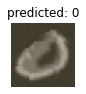

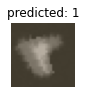

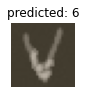

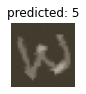

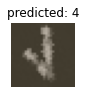

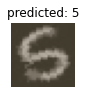

In [244]:
visualize_model(model_ft)

In [245]:
import natsort as nt
from PIL import Image
from torch.autograd import Variable 

def test_model():
    data_transforms = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    model_ft = torch.load('./model/emnist_model1_4.pt', map_location=device)
    path_test = os.path.join(os.getcwd(), 'emnist/test')
    image_list = nt.natsorted(os.listdir(path_test))
    output_list = []
    for i, images in enumerate(image_list):
        path_test_image = os.path.join(path_test, images)
        image = Image.open(path_test_image)
        image = data_transforms(image)
        image.unsqueeze_(dim=0)
        image = Variable(image)
        image = image.cuda(device)
        torch.no_grad()
        output = model(image)
        output = torch.argmax(output, dim=1)
        output_list.append(output)
        
    return output_list

output = test_model()

In [246]:
submission = pd.read_csv('submission.csv')
submission.digit = torch.cat(output).detach().cpu().numpy()
submission.to_csv('./result/submission1_4.csv', index=False)

In [247]:
submission

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8
